In [31]:
Example project https://www.kaggle.com/code/sultansagynov/first-glance-on-a-b-test-aggregated-data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [32]:
df = pd.read_csv(r"/Users/home/Documents/projects/Analysis/A:B Test 10:24/ab_test_results_aggregated_views_clicks_2.csv")

In [33]:
df.head(3)

,user_id,group,views,clicks
0,1,control,10.0,0.0
1,2,control,1.0,0.0
2,3,control,1.0,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  120000 non-null  int64  
 1   group    120000 non-null  object 
 2   views    120000 non-null  float64
 3   clicks   120000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [35]:
df.describe()

,user_id,views,clicks
count,120000.000000,120000.000000,120000.000000
mean,60000.500000,4.991075,0.182692
std,34641.160489,5.915200,0.472547
min,1.000000,1.000000,0.000000
25%,30000.750000,2.000000,0.000000
50%,60000.500000,3.000000,0.000000
75%,90000.250000,6.000000,0.000000
max,120000.000000,205.000000,9.000000


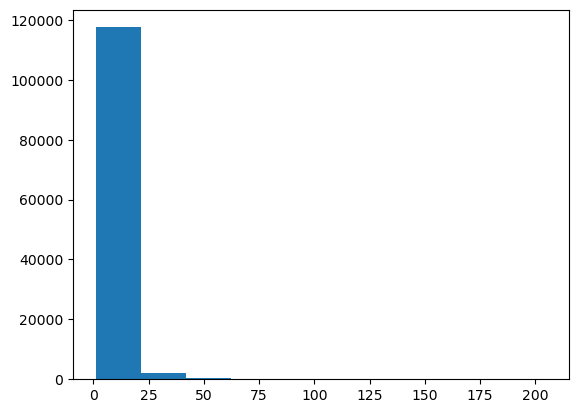

clicks
0.0    0.845642
1.0    0.132050
2.0    0.018008
3.0    0.003142
4.0    0.000817
5.0    0.000200
6.0    0.000083
7.0    0.000042
9.0    0.000008
8.0    0.000008
Name: proportion, dtype: float64

In [36]:
plt.figure()
plt.hist(df["views"])
plt.show()

df["clicks"].value_counts(normalize=True)

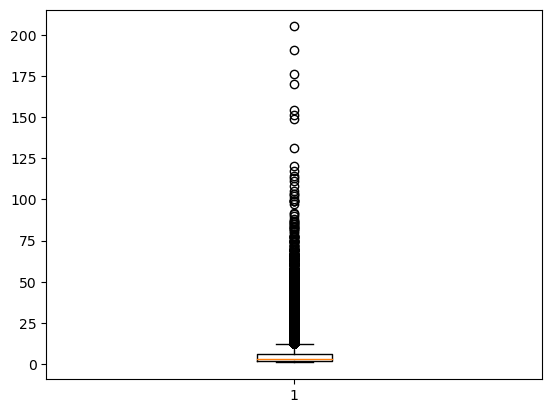

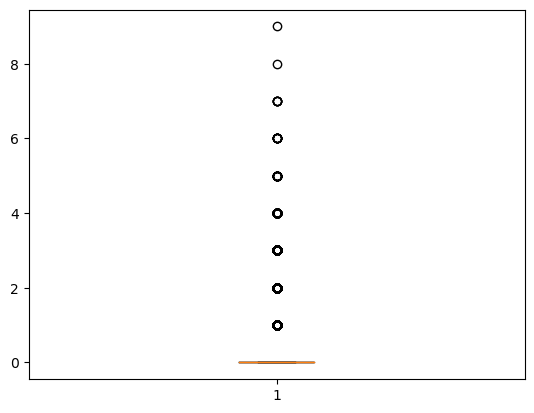

In [37]:
plt.figure()
plt.boxplot(df['views'])
plt.show()

plt.figure()
plt.boxplot(df['clicks'])
plt.show()

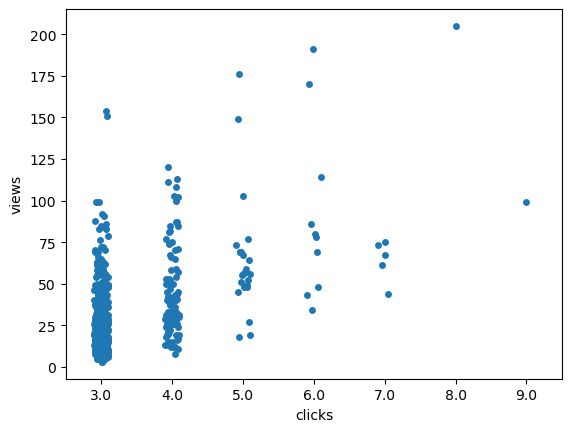

In [38]:
df_high_clicks = df[(df["clicks"] > 2)]
# Add jitter to discrete variable to separate overlapping points
sns.stripplot(x="clicks", y="views", data=df_high_clicks, jitter=True)
plt.show()

In [39]:
Q1 = df["views"].quantile(0.25)
Q3 = df["views"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Identify upper outliers
upper_outliers = df["views"][df["views"] > upper_bound]

# Output the upper bound
print(f"Upper bound for outliers: {upper_bound}")

Upper bound for outliers: 12.0


In [40]:
print(f'{round(df[(df["views"] > 12)]["views"].count() / df["views"].count() * 100,2)}%')

6.96%


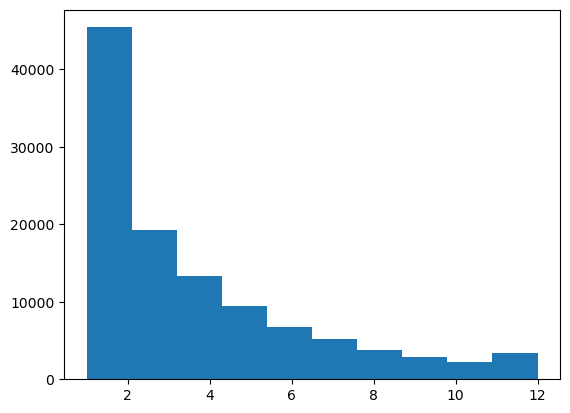

In [41]:
df_viewoutliers_removed = df[(df["views"] <= 12)]

plt.figure()
plt.hist(df_viewoutliers_removed["views"])
plt.show()

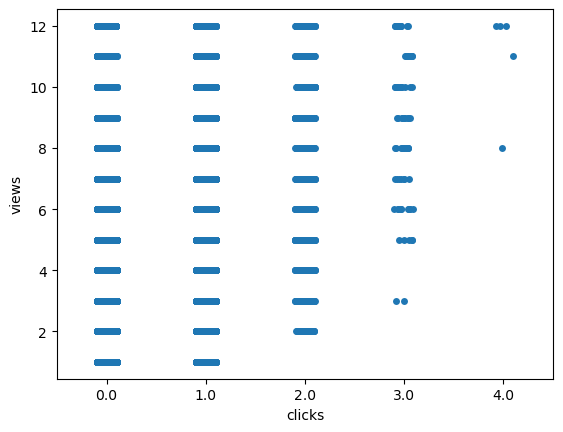

In [42]:
sns.stripplot(x="clicks", y="views", data=df_viewoutliers_removed, jitter=True)
plt.show()

In [43]:
df_control = df_viewoutliers_removed.loc[df_viewoutliers_removed["group"] == "control"]
(df_control["clicks"].mean() / df_control["views"].mean()) * 100

3.47771327923031

In [44]:
df_test = df_viewoutliers_removed.loc[df_viewoutliers_removed["group"] == "test"]
(df_test["clicks"].mean() / df_test["views"].mean()) * 100

3.8779940049426336

In [45]:
shapiro(df_control['clicks'])

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.389129638671875, pvalue=0.0)

In [46]:
shapiro(df_test['clicks'])

ShapiroResult(statistic=0.4103204607963562, pvalue=0.0)

In [47]:
mannwhitneyu(df_control['clicks'], 
             df_test['clicks'])

MannwhitneyuResult(statistic=1538317034.0, pvalue=1.9559880029243224e-10)